In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('percentage-possible-sunshine-Japanweather1.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

year  total_precipitation  mean_air_temperature  mean_wind_speed  \
0  Jan-10                 75.5                  -3.4              5.5   
1  Feb-10                109.5                  -4.9              4.1   
2  Mar-10                100.5                  -1.4              4.7   
3  Apr-10                 94.0                   3.5              4.3   
4  May-10                 76.5                   7.3              4.9   

   mean_relative_humidity  total_sunshine_duration  solar_radiation  \
0                      75                     40.4              8.1   
1                      74                     48.8              9.1   
2                      68                    108.0             12.2   
3                      77                    146.2             14.5   
4                      86                    168.6             19.2   

   percentage_possible_sunshine  
0                            14  
1                            17  
2                            29  
3                            36  
4                            37

In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

#dates = X[:,0]
dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.9670959915128634


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[13.5334085  16.43185768 31.13263238 36.75247251 36.77196193 45.38689074
 12.9557872  38.42299489 54.32121214 42.75692284 20.15655537 11.90883157
 17.71007528 24.81288793 41.12787877 33.66353831 30.05221612 24.13289912
 28.61861638 40.01900039 43.34401481 39.46685735 25.62069489 13.73163011
 15.46192876 23.62374111 36.06420672 50.15420528 31.59197126 49.56240292
 25.58370268 34.16381475 29.84456222 34.88970115 12.27596857  9.54181335
 14.11011328 18.885339   27.02827657 40.98108747 22.99594932 42.19147663
 49.95122594 24.02423974 38.85093295 39.42832053 23.97889146 13.83166849
 17.03372883 28.07279971 50.58342702 52.30186887 30.79170554 41.6694217
 36.32283483 44.86164972 40.49791666 40.90510493 31.51252442 13.22520284
 18.01307502 23.64068113 29.49992275 44.88920016 43.05066675 27.78585352
 28.8774497  31.74627692 44.42859329 35.16965171 27.35348724 19.93925517
 13.41939429 13.29075854 39.07445126 36.31880548 61.36159421 37.86229633
 37.45310712 38.64025488 40.944

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 1.8771239514168598
Mean Squared Error: 5.7460795571222105
Root Mean Squared Error: 2.3970981534184643


Text(0.5, 1.0, 'Percentage possible sunshine - actual and predicted values')

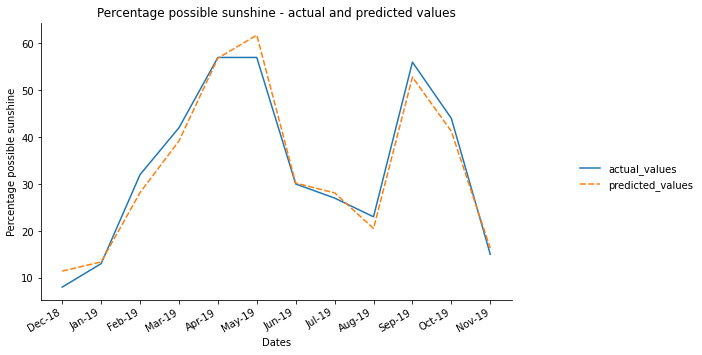

In [9]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Percentage possible sunshine') #set the label for the y-axis
plt.title('Percentage possible sunshine - actual and predicted values') #set the title of the graph